In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost
from sklearn import metrics
%matplotlib inline
dataset = pd.read_csv('24-hours dataset(old).csv', parse_dates=True)
dataset.head(100)
print(xgboost.__version__)

2.1.1


In [3]:
dataset['timestamp']=pd.to_datetime(dataset['timestamp'])

In [4]:
x_data=dataset.values[:,(2,3,4,5,6,7)]
print(x_data)
x_target=dataset.values[:,9]
print(x_target)
print("x_data : ", x_data.shape)
print("x_target : " ,x_target.shape)
#x_train,x_test,y_train,y_test=train_test_split()

[[6 0 1 17.483570765056164 0 7.819507374259289]
 [6 1 1 14.308678494144075 0 0.8863756986523486]
 [6 2 1 18.23844269050346 0 0.798469675723642]
 ...
 [5 22 1 7.153052023126581 0 9.686245673010587]
 [5 23 1 11.815588055305213 0 0.4987254081937464]
 [6 0 1 16.035697183892843 0 0.6293595440244149]]
['Normal Operation' 'Normal Operation' 'Normal Operation' ...
 'Peak Load Shifting' 'Normal Operation' 'Normal Operation']
x_data :  (8737, 6)
x_target :  (8737,)


In [5]:
x_train,x_test,y_train,y_test=train_test_split(x_data,x_target,test_size=0.3,random_state=42)

print(x_train.shape)

print(y_train.shape)

print(x_test)

y_test

(6115, 6)
(6115,)
[[4 14 0 14.249722064837366 0 141.19595334256198]
 [2 1 0 30.385393056907468 0 0.7951593403083301]
 [6 6 1 31.739580390604416 0 130.2453683981196]
 ...
 [6 2 1 33.47583008809128 0 5.164738681007048]
 [1 6 0 36.7305171193124 0 209.9429302534912]
 [0 0 0 21.321330315261864 0 3.589829380247856]]


array(['Normal Operation', 'Normal Operation', 'Normal Operation', ...,
       'Normal Operation', 'Increased Renewable Energy Integration',
       'Normal Operation'], dtype=object)

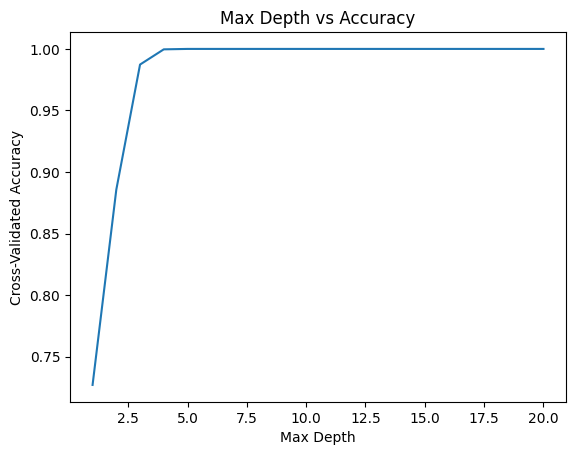

In [6]:
from sklearn.model_selection import cross_val_score


depths = range(1, 21)  # Test depths from 1 to 20
scores = []

for depth in depths:
    model = DecisionTreeClassifier(max_depth=depth)
    cv_scores = cross_val_score(model, x_data, x_target, cv=5)  # 5-fold CV
    scores.append(np.mean(cv_scores))

# Plotting results to find optimal depth

plt.plot(depths, scores)
plt.xlabel('Max Depth')
plt.ylabel('Cross-Validated Accuracy')
plt.title('Max Depth vs Accuracy')
plt.show()

In [7]:
Decision_tree =DecisionTreeClassifier(criterion='entropy',random_state=42,max_depth=3,min_samples_leaf=5)


In [8]:
Decision_tree.fit(x_train,y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=5,
                       random_state=42)

['Normal Operation' 'Normal Operation' 'Normal Operation' ...
 'Normal Operation' 'Increased Renewable Energy Integration'
 'Normal Operation']
Accuracy ::  98.77955758962625
Index(['day_of_week', 'hour_of_day', 'is_weekend', 'temperature', 'is_holiday',
       'solar_generation'],
      dtype='object')


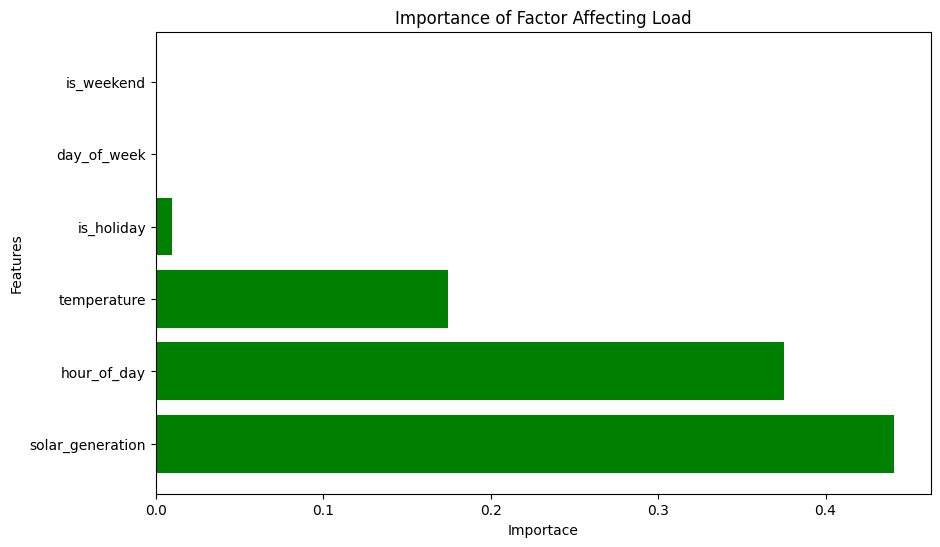

In [89]:
#predict the Decision Tree
y_predict_en=Decision_tree.predict(x_test)
print(y_predict_en)
#accuarcy
from sklearn.metrics import accuracy_score
print("Accuracy :: ", accuracy_score(y_test,y_predict_en)*100)
#plotting bar graph
importance_columns=Decision_tree.feature_importances_
#conversion of x_data to dataFrame
x_data_df=pd.DataFrame(dataset[['day_of_week','hour_of_day','is_weekend','temperature','is_holiday','solar_generation']])
#creating the DataFrame
x_data_df
importance_data = pd.DataFrame({
    'Features' :x_data_df.columns,
    'Importance' : importance_columns
}).sort_values(by='Importance',ascending=False)
print(x_data_df.columns)
#plotting
plt.figure(figsize=(10,6))
bars =plt.barh(importance_data['Features'],importance_data['Importance'],color='green')

# Adding labels to each bar
#for bar,column_name in zip(bars,x_data_df.columns):
 #   plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2,column_name,
  #          va='center', ha='left', color='black')
plt.title('Importance of Factor Affecting Load')
plt.xlabel('Importace')
plt.ylabel('Features')
plt.show()

                timestamp  day_of_week  hour_of_day  is_weekend  temperature  \
0     2024-01-01 00:00:00            0            0           0    28.534249   
1     2024-01-01 01:00:00            0            1           0    18.140664   
2     2024-01-01 02:00:00            0            2           0    19.539847   
3     2024-01-01 03:00:00            0            3           0    17.519129   
4     2024-01-01 04:00:00            0            4           0    18.255590   
...                   ...          ...          ...         ...          ...   
8756  2024-12-30 20:00:00            0           20           0     7.929691   
8757  2024-12-30 21:00:00            0           21           0    10.136094   
8758  2024-12-30 22:00:00            0           22           0    16.290948   
8759  2024-12-30 23:00:00            0           23           0    18.676171   
8760  2024-12-31 00:00:00            1            0           0     7.619222   

      is_holiday  solar_generation  ele

C:\Users\Rudra\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


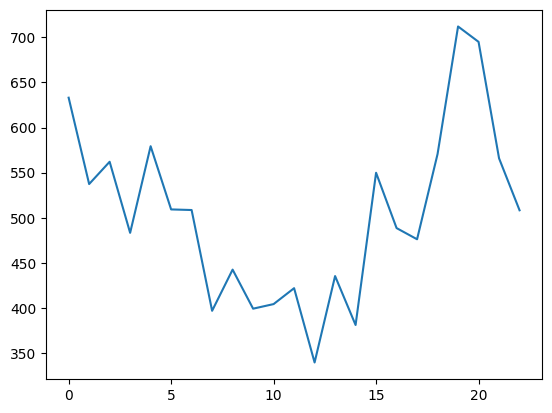

In [18]:
#testing with another dataset
dataset2=pd.read_csv('24-hours testset.csv')
print(dataset2)
x_test_2nd=pd.DataFrame(dataset2[['day_of_week','hour_of_day','is_weekend','temperature','is_holiday','solar_generation']])

y_predict_2nd=Decision_tree.predict(x_test_2nd)
print(y_predict_2nd[:23])
plt.plot(dataset2['hour_of_day'].head(23),dataset2['electricity_demand'].head(23))
plt.show()

In [27]:
from sklearn.metrics import classification_report, confusion_matrix

0.0
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


SyntaxError: invalid syntax (3552045918.py, line 2)